<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/04_M%C3%A9todosNum%C3%A9ricos/02_M%C3%ADnimosCuadrados/02_Ejemplo_MinimosCuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo aplicado de mínimos cuadrados
### Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME 

*   Autor: 
    - Ingrid Pamela Ruiz Puga

*   Rev: vier may 14 14:09:45 CDT 2021

## Mínimos cuadrados

El método de mínimos cuadrados proporciona una forma de encontrar la mejor estimación, suponiendo que los errores (es decir, las diferencias con respecto al valor verdadero) sean aleatorias e imparciales.

Este método se utiliza comúnmente para analizar una serie de datos que se obtengan de algún estudio, con el fin de expresar su comportamiento de manera lineal y así minimizar los errores de la data tomada.

La creación del método de mínimos cuadrados generalmente se le acredita al matemático alemán Carl Friedrich Gauss, quien lo planteó en 1794 pero no lo publicó sino hasta 1809. El matemático francés Andrien-Marie Legendre fue el primero en publicarlo en 1805, este lo desarrolló de forma independiente.




### Ejercicio práctico sobre temperaturas.

Se obtuvieron datos de *Conagua* correspondientes a la temperatura anual promedio registrada en los diferentes estados de la república entre los años 2002 y 2019.

Se eligieron las temperaturas del estado de Colima, las cuales son las siguientes:


| Año | Temperatura |
| ----- |  ----- |
| 2002 | 25.2 |
| 2003 | 26.2 | 
| 2004 |  25.8 |
| 2005 |  25.8 | 
| 2006 | 28.7 | 
| 2007 | 28.4 | 
| 2008 |  29.5 | 
| 2009 | 28.4 | 
| 2010 | 28.4 | 
| 2011 | 27.8 | 
| 2012 | 26.5 | 
| 2013 |  25.6 | 
| 2014 | 25.9 | 
| 2015 |  25.5 | 
| 2016 | 26.2 | 
| 2017 | 26.2 | 
| 2018 | 26.7 | 
| 2019 | 29.3 | 

El gobierno de Colima desea obtener una aproximación de la temperatura en 2020, pues será importante para la administración de ese año condonar servicios a causa de uso de ventiladores y aire acondicionado. Todo dependerá de la temperatura estimada en el año 2020 por lo que es importante conocer alguna aproximación.

**Solución**

Este procedimiento de análisis numérico en el que, dados un conjunto de datos (pares ordenados y familia de funciones), se intenta determinar la función continua que mejor se aproxime a los datos (línea de regresión o la línea de mejor ajuste), proporcionando una demostración visual de la relación entre los puntos de los mismos. En su forma más simple, busca minimizar la suma de cuadrados de las diferencias ordenadas (llamadas residuos) entre los puntos generados por la función y los correspondientes datos.\newline

Este método se utiliza comúnmente para analizar una serie de datos que se obtengan de algún estudio, con el fin de expresar su comportamiento de manera lineal y así minimizar los errores de los datos tomados.

El sistema que se desea resolver es de la forma:

\begin{equation}
\begin{pmatrix}
1&x_{1}  & \cdots & x_{1}^{n-1}\\
1&x_{2} & \cdots & x_{2}^{n-1}\\
\vdots  & \ddots & \vdots\\
1&x_{m}  & \cdots & x_{m}^{n-1}
\end{pmatrix}
\begin{pmatrix}
c_{1}\\
c_{2}\\
\vdots \\
c_{n-1}
\end{pmatrix}
=
\begin{pmatrix}
y_{1}\\
y_{2}\\
\vdots \\
y_{m}
\end{pmatrix}
\end{equation} 

Por lo que se procederá a hacer  la matriz cuadrada multiplicando por su transpuesta en ambos lados de la igualdad del sistema, estas ecuaciones normales aseguran que la solución X del sistema minimiza la  distancia del sistema de ecuaciones es decir, la norma $||Ax-b||$. Posteriormente se resuelve el sistema usando la factorización Cholesky.

Hay que recordar que se busca aproximar los datos a un polinomi de grado $n$, como el siguiente:

\begin{equation}
   P(x) = ax^n+ \cdots + bx^2 + cx+ d
\end{equation}

In [ ]:
#Importamos librerias que necesitaremos
import numpy as np
import matplotlib.pyplot as plt
import  seaborn  as  sns 
sns.set()

In [ ]:
#Vector con las temperaturas observadas en el 2002 al 2019
b = np.array([25.2, 26.2, 25.8, 25.8, 28.7, 28.4, 29.5, 28.4, 28.4, 27.8, 26.5, 25.6, 25.9, 25.5, 26.2, 26.2, 26.7, 29.3])

#Vector solución
x=np.array(range(1,19,1))

#Función para creal la matriz correspondiente a minios cuadrados
def creando_matriz(x,n):
    A=np.zeros([len(x), n+1])
    for i in range(len(x)):
        for j in range(n):
                A[i,j]= x[i]**(n-j)
                A[i,n]=1.0
    return A

# Grado del polinimio
n=5

#Ahora vamos a hacer la matriz de coeficientes cuadrada, multiplicando 
#por ambos lados la transpuesta de A
A=creando_matriz(x,n)

#Multiplicando por transpuesta
ATA=A.T@A

#Tamibien multiplicamos la transpuesta del otro lado de la ecuación
ATb=A.T@b

#Resolvemos el sistema de ecuaciones
sol = np.linalg.solve(ATA, ATb)

#Funcion que evalua polinomios segun el grado
def polinomio(grado,x,meses):
  resultados = []
  #print(x)
  for dato in meses:
    suma = 0
    #print("##")
    for termino in range(grado):
      #print(termino)
      suma += x[int(termino)] * (int(dato) ** (grado - termino))
    resultados.append(suma + x[grado])
  return resultados

#Veamos cual es el error en la aproximación
error=[]
error.append(b-polinomio(n,sol,x))

#Creamos un vector para pronosticar
x5=np.array(range(1,25,1))
print("Aproximaciones",polinomio(n,sol,x5))
print("error total",sum(abs(sum(error))))

Aproximaciones [25.472151723269505, 25.372285514938977, 26.032912990369205, 26.98435145636654, 27.89426938656009, 28.5505953955852, 28.84442721326694, 28.75294065880359, 28.32229861495007, 27.650560002201484, 26.870588752976523, 26.13296278580109, 25.588882979491636, 25.37308214733855, 25.586734011289977, 26.280362176135014, 27.436749103687234, 28.953845086968272, 30.62767722439083, 32.135258393943694, 33.0174962273724, 32.66210208436563, 30.286500026737258, 24.92073579260945]
error total 7.827230085987903


Ahora graficamos la aproximación

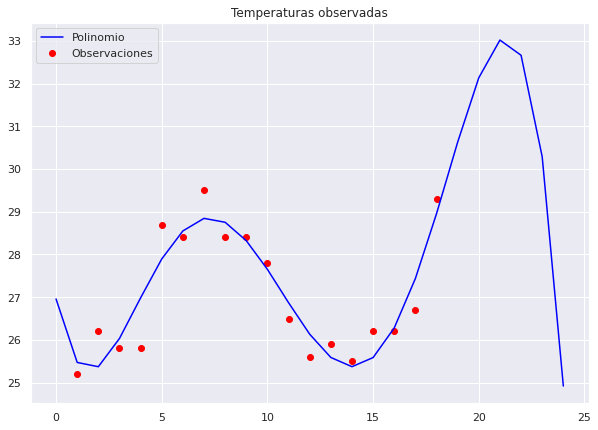

In [ ]:
#Tamaño de la figura
plt.figure(figsize=(10,7))

#Vector x a evaluar
x4 = np.arange(0.0,25.0,1) 

#Graficamos las observaciones
plt.scatter(x, b, c='red', label="Observaciones")

#Graficamos el polinomio
plt.plot(x4, polinomio(n,sol,x4), c="blue", label="Polinomio")

#Agregamos titulo a la gráfica
plt.title("Temperaturas observadas")
plt.legend()
plt.show()

## Referencias
Para profundizar en los temas tratados en el presente documento se pueden consultar las siguientes fuentes.

* https://miprofe.com/minimos-cuadrados/
* http://matematicas.unex.es/~trinidad/MM/tema2.pdf